In [ ]:

























import pandas as pd
import numpy as np
import re
import string
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import RegexpTokenizer
from nltk import PorterStemmer, WordNetLemmatizer
import pickle
import nltk
nltk.download('wordnet')
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
nltk.download('vader_lexicon')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
data = pd.read_csv('/content/cyberbullying_tweets.csv')

In [ ]:
labelencoder = LabelEncoder()
data['cyberbullying_type_encoded'] = labelencoder.fit_transform(data['cyberbullying_type'])
data[['cyberbullying_type', 'cyberbullying_type_encoded']].value_counts()

cyberbullying_type   cyberbullying_type_encoded
religion             5                             7998
age                  0                             7992
gender               2                             7973
ethnicity            1                             7961
not_cyberbullying    3                             7945
other_cyberbullying  4                             7823
Name: count, dtype: int64

In [ ]:
def text_lower(text):
    return text.str.lower()

# removing stopwoords from the tweet text
def clean_stopwords(text):
    # stopwords list that needs to be excluded from the data
    stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']
    STOPWORDS = set(stopwordlist)
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

# cleaning and removing punctuations
def clean_puctuations(text):
    english_puctuations = string.punctuation
    translator = str.maketrans('','', english_puctuations)
    return text.translate(translator)

# cleaning and removing repeating characters
def clean_repeating_characters(text):
    return re.sub(r'(.)1+', r'1', text)

# cleaning and removing URLs
def clean_URLs(text):
    return re.sub(r"((www.[^s]+)|(http\S+))","",text)

# cleaning and removing numeric data
def clean_numeric(text):
    return re.sub('[0-9]+', '', text)

# Tokenization of tweet text
def tokenize_tweet(text):
    tokenizer = RegexpTokenizer('\w+')
    text = text.apply(tokenizer.tokenize)
    return text

# stemming
def text_stemming(text):
    st = PorterStemmer()
    text = [st.stem(word) for word in text]
    return text

# lemmatization
def text_lemmatization(text):
    lm = WordNetLemmatizer()
    text = [lm.lemmatize(word) for word in text]
    return text

In [ ]:
def preprocess(text):
    text = text_lower(text)
    text = text.apply(lambda text: clean_stopwords(text))
    text = text.apply(lambda x : clean_puctuations(x))
    text = text.apply(lambda x: clean_repeating_characters(x))
    text = text.apply(lambda x : clean_URLs(x))
    text = text.apply(lambda x: clean_numeric(x))
    text = tokenize_tweet(text)
    text = text.apply(lambda x: text_stemming(x))
    text = text.apply(lambda x: text_lemmatization(x))
    text = text.apply(lambda x : " ".join(x))
    return text

data['tweet_text'] = preprocess(data['tweet_text'])
data

,tweet_text,cyberbullying_type,cyberbullying_type_encoded
0,word katandandr food crapilici mkr,not_cyberbullying,3
1,aussietv white mkr theblock imacelebrityau tod...,not_cyberbullying,3
2,xochitlsuckkk classi whore red velvet cupcak,not_cyberbullying,3
3,jasongio meh p thank head up but not concern a...,not_cyberbullying,3
4,rudhoeenglish isi account pretend kurdish acco...,not_cyberbullying,3
...,...,...,...
47687,black ppl arent expect anyth depend anyth yet ...,ethnicity,1
47688,turner not withhold disappoint turner call cou...,ethnicity,1
47689,swear god dumb nigger bitch got bleach hair re...,ethnicity,1
47690,yea fuck rt therealexel nigger fuck unfollow m...,ethnicity,1


In [ ]:
X, y = data['tweet_text'], data['cyberbullying_type_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 41)

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features= 500000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [ ]:
pickle.dump(vectoriser, open('/content/tdf_vectorizer', 'wb'))

In [ ]:
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)

In [ ]:
svm_model_linear = SVC(kernel= 'linear', C = 1).fit(X_train, y_train)
svm_predictions  = svm_model_linear.predict(X_test)
accuracy = svm_model_linear.score(X_test, y_test)
print(accuracy)

0.8290466871680179


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocess the testing set
X_test_preprocessed = preprocess(X_test)

# Load the trained model and vectorizer
vectorizer = pickle.load(open("/content/tdf_vectorizer", "rb"))
model = pickle.load(open("/content/model.bin", "rb"))

# Make predictions on the testing set
y_pred = []
for text in X_test_preprocessed:
    prediction = prediction_intensity(text, vectorizer, model)
    y_pred.append(prediction)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

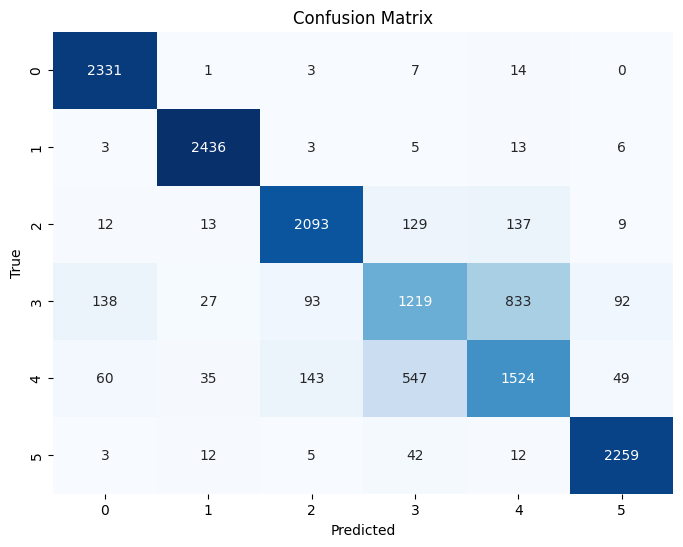

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2356
           1       0.97      0.99      0.98      2466
           2       0.89      0.87      0.88      2393
           3       0.63      0.51      0.56      2402
           4       0.60      0.65      0.62      2358
           5       0.94      0.97      0.95      2333

    accuracy                           0.83     14308
   macro avg       0.82      0.83      0.82     14308
weighted avg       0.82      0.83      0.82     14308



In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

# Generate classification report
report = classification_report(y_test, svm_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:")
print(report)

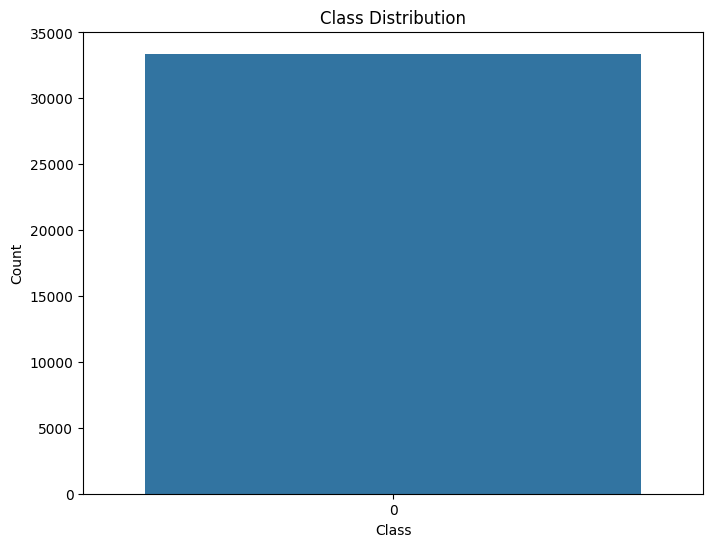

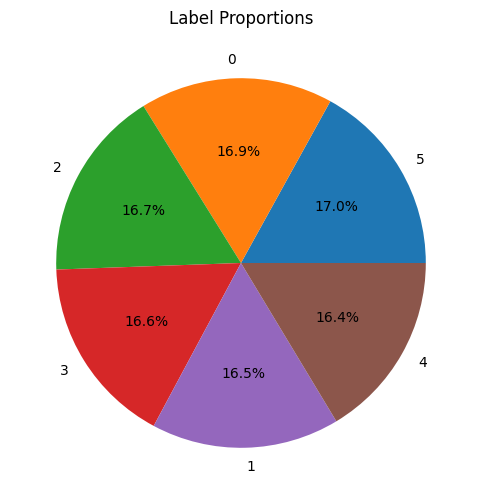

In [ ]:
# Bar plot for class distribution
plt.figure(figsize=(8, 6))
sns.countplot(y_train)  # Use y_train for class distribution
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

# Pie chart for label proportions
label_counts = pd.Series(y_train).value_counts()  # Use y_train for label proportions
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title("Label Proportions")
plt.show()

In [ ]:
pickle.dump(svm_model_linear, open('/content/model.bin', 'wb'))

In [ ]:
def prediction_intensity(text, vectorizer, model):
    print(text)
    inten = text

    text = pd.Series(text)
    text = preprocess(text)

    text = [text[0],]
    vectoriser = pickle.load(open("tdf_vectorizer", "rb"))
    text = vectoriser.transform(text)
    model = pickle.load(open("model.bin", "rb"))
    prediction = model.predict(text)
    prediction = prediction[0]

    interpretations = {
        0 : "This tweet falls into cyberbullying category: Age",
        1 : "This tweet falls into cyberbullying category: Ethnicity",
        2 : "This tweet falls into cyberbullying category: Gender",
        3 : "The tweet does not fall under Cyberbullying",
        4 : "Other Cyberbullying",
        5 : "This tweet falls into cyberbullying category: Religion"
    }


    for i in interpretations.keys():
        if i == prediction:
            print(interpretations[i])

    score = sentiment.polarity_scores(inten)
    print("Overall cyberbullying intensity of tweet: ", score)
    if(prediction == 3):
      pass
    else:
      print("Tweet is ", score['neg']*100, "% Negative")
      print("Tweet is ", score['neu']*100, "% Neutral")
      print("Tweet is", score['pos']*100, "% Positive")
      print("Will the tweet affect the person? ", end = " ")
      if score['compound'] >= 0.05 :
        print("No")
      elif score['compound'] <= - 0.05 :
        print("Yes")
      else :
        print("Neutral")

In [ ]:
line2 = "She is happy today as I got her flowers"

In [ ]:
prediction_intensity(line2)

The tweet does not fall under Cyberbullying
Overall cyberbullying intensity of tweet:  {'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'compound': 0.5719}


In [ ]:
line3 = "She was so ugly that I left the place"

In [ ]:
prediction_intensity(line3)

Other Cyberbullying
Overall cyberbullying intensity of tweet:  {'neg': 0.377, 'neu': 0.623, 'pos': 0.0, 'compound': -0.6418}
Tweet is  37.7 % Negative
Tweet is  62.3 % Neutral
Tweet is 0.0 % Positive
Will the tweet affect the person?  Yes
